---
title: Introduction to Google Colab and Clustering
subtitle: AgroGeo24 Clustering Workshop Part 1
---

(part1-links)=
:::{note} Run in Google Colab
This is computational article that can be executed on Google Colab:\
[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1bMl40jKsClJJOt-oJPw8m9MqhIRC_mn4?usp=sharing)
:::

**Please save a copy of this notebook in your Google Drive before running**

Click "File" and "Save a copy in Drive" to save a copy of this notebook to your own Google Drive.

This workshop is accompanied by a live presentation from the workshop leader which gives context and background on the datasets provided and also any follow on conclusions and uses with links to relevant papers and articles.

In this part of the workshop you will be generating some randomised 3D data, which have distinct locations in the dataspace. These will aid in the conceptulisation of clustering which will help with understanding the rest of the workshop.

This Part will also act as a basic introduction to Google Colab and work out any problems before we move on to more complex code and worksheets.

The aim of this workshop is to become familiar with Google Colab and running code in this environment and to cluster these randomised data and using the provided code.

Please following along with the workshop leader in the first instance until you are familiar with using Google Colab environment.

No coding experience is required to run this code. All the code contains comments describing what each line does. Please click "Show Code" on any section to view the code and click "View" and "Show/Hide code" to hide the code again.

Please feel free to ask questions if you don't understand any parts.

# Section 0

This section sets up the Python environment for the clustering analysis.

It imports essential libraries such as Pandas for data manipulation, NumPy for numerical operations, Matplotlib for data visualization, scikit-learn for machine learning tools, and other supporting libraries.

Additionally, it configures the display.

The code also imports specific functions and modules required for the clustering analysis, such as KMeans.

Finally, it sets up tools for working with images, zip files, and file uploads in Google Colab. This preparation ensures that the subsequent code can efficiently perform clustering analysis and handle related tasks.

Press the play button below:

⬇

In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import imageio.v2 as imageio
import os
from zipfile import ZipFile

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from collections import Counter
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import ListedColormap
from PIL import Image
from google.colab import files



# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Great!

# Section 1

Now we are going to generate the data!

These are randomly generated 3D data point, with an x, y, and z value being assigned to each. They are generated in 3 "groups" in order to simulate a dataset that has clear groups. Once the data are create their order is randomised to highlight the power of clustering.

This section will help with visualising and conceptulising the centroid clustering technique we are using today.

Press the play button below to generate and view the data. You will be asked to enter the number of datapoint per group and a value for how disperse they are.

Run this code a few times with different values to see the outputs change.

Enter the number of points within each group (i.e., 100): 50
Enter a value for how disperse the data should be (i.e., low = 1, high = 20): 15
       X      Y       Z
0  60.29  25.81   42.92
1  81.54  77.67   93.66
2  75.90  82.29   74.11
3  86.97  86.73  106.48
4  11.38 -19.81    6.70
5  67.38  37.69   64.45
6  57.24  46.65   60.71
7  78.40  90.37   97.47
8  -2.13   2.47   23.73
9  93.48  68.28   68.89


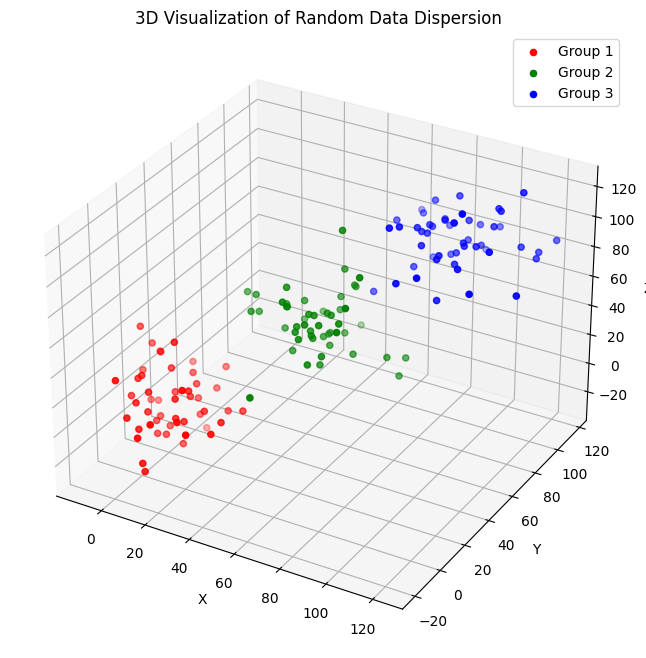

In [ ]:
# @title
# Set random seed for reproducibility
np.random.seed(42)

# Number of data points in each group
num_points = int(input("Enter the number of points within each group (i.e., 100): "))

# Set the standard deviation for each group (controls dispersion)
std_deviation = int(input("Enter a value for how disperse the data should be (i.e., low = 1, high = 20): "))

# Generate random data for three groups with increased dispersion
group1_center = np.array([10, 10, 10])
group2_center = np.array([50, 50, 50])
group3_center = np.array([90, 90, 90])

group1_data = np.round(group1_center + std_deviation * np.random.normal(size=(num_points, len(group1_center))),2)
group2_data = np.round(group2_center + std_deviation * np.random.normal(size=(num_points, len(group2_center))),2)
group3_data = np.round(group3_center + std_deviation * np.random.normal(size=(num_points, len(group3_center))),2)

# Merge the data from all three groups
all_data = np.vstack([group1_data, group2_data, group3_data])

# Shuffle the merged data
np.random.shuffle(all_data)

# Create a DataFrame
columns = ['X', 'Y', 'Z']
remaining_data = pd.DataFrame(all_data, columns=columns)

# Display the first few rows of the DataFrame
print(remaining_data.head(10))

# Visualize the data in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each group
ax.scatter(group1_data[:, 0], group1_data[:, 1], group1_data[:, 2], label='Group 1', c='red', marker='o')
ax.scatter(group2_data[:, 0], group2_data[:, 1], group2_data[:, 2], label='Group 2', c='green', marker='o')
ax.scatter(group3_data[:, 0], group3_data[:, 1], group3_data[:, 2], label='Group 3', c='blue', marker='o')

# Set plot properties
ax.set_title('3D Visualization of Random Data Dispersion')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

# Show the plot
plt.show()


# Section 2

This section performs data normalization, a crucial step before applying clustering algorithms.

The resulting normalized data is displayed, providing an insight into the standardized values across the dataset.

Normalization enhances the accuracy of clustering algorithms, ensuring that features with different scales contribute equally to the clustering process.


Press the play button to run the code

# ⬇

In [ ]:
# @title
#### Section 2 Normalization ####

# Custom normalization using MinMaxScaler
min_vals = remaining_data.min()
max_vals = remaining_data.max()

normalized_data = (remaining_data - min_vals) / (max_vals - min_vals)

# Display the normalized data
print("\nNormalized Data:")
print(normalized_data.head(10).to_string(index=False))  # Use to_string to prevent truncation


Normalized Data:
       X        Y        Z
0.532716 0.335096 0.476385
0.691440 0.716028 0.811082
0.649313 0.749963 0.682124
0.731999 0.782577 0.895646
0.167389 0.000000 0.237467
0.585674 0.422359 0.618404
0.509934 0.488174 0.593734
0.667986 0.809314 0.836214
0.066477 0.163655 0.349802
0.780624 0.647055 0.647691


# Section 3

This section guides the user in determining the optimal number of clusters (k) for the K-Means algorithm by utilizing both the Elbow Method and Silhouette Scores.

After specifying the maximum number of clusters to consider, the code calculates the Within-Cluster Sum of Squares (WCSS) distance using the Elbow Method. The Elbow Method graph illustrates the trade-off between clustering complexity and WCSS reduction, helping identify an optimal k value.

Simultaneously, Silhouette Scores, a measure of how well-separated clusters are, are computed and presented on the same graph. Silhouette Scores range from -1 to 1, where higher scores indicate better-defined clusters.

When assessing the graph, users should look for the "elbow" point where WCSS plateaus, suggesting diminishing returns with additional clusters.

Additionally, a high Silhouette Score at the "elbow" reinforces the choice, ensuring a balance between compact clusters and distinct cluster boundaries for effective clustering.

When running the cell, you will be prompted to enter the max number of clusters. (i.e., 10).


Press the play button to run the code.

# ⬇

Enter the maximum number of clusters for the Elbow Method: 8


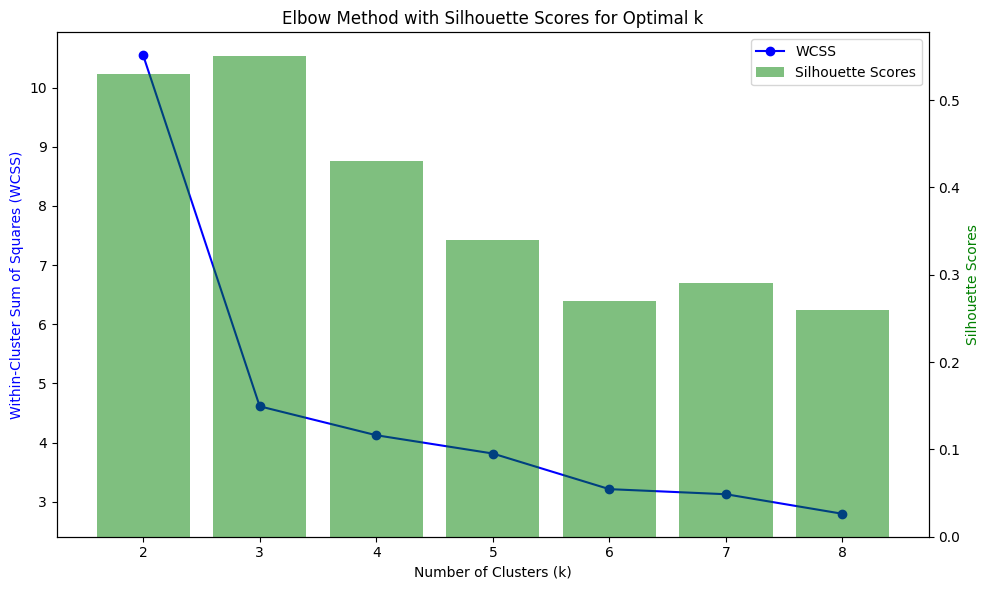

In [ ]:
# @title
#### Section 3 Elbow Method with Silhouette Scores ####

# Prompt the user to choose the maximum number of clusters for the Elbow Method
max_clusters_elbow = int(input("Enter the maximum number of clusters for the Elbow Method: "))

# Calculate the within-cluster sum of squares (WCSS) and Silhouette Scores for different values of k
wcss = []
silhouette = []
for k in range(2, max_clusters_elbow + 1):
    kmeans = KMeans(n_clusters=k, n_init=1, init='k-means++')
    kmeans.fit(normalized_data)
    sscore = round(silhouette_score(normalized_data, kmeans.labels_), 2)
    silhouette.append(sscore)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph with Silhouette Scores as a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot WCSS on the left y-axis
ax1.plot(range(2, max_clusters_elbow + 1), wcss, marker='o', color='blue', label='WCSS')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color='blue')

# Set the x-axis ticks to show only integers
plt.xticks(range(2, max_clusters_elbow + 1))

# Create a second y-axis for Silhouette Scores
ax2 = ax1.twinx()
ax2.bar(range(2, max_clusters_elbow + 1), silhouette, color='green', alpha=0.5, label='Silhouette Scores')
ax2.set_ylabel('Silhouette Scores', color='green')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.title('Elbow Method with Silhouette Scores for Optimal k')
fig.tight_layout()
plt.show()


# Section 4

In this section, users will perform K-Means clustering on the data. The optimal number of clusters (k) can be determined by referencing the results from the previous Elbow Method and Silhouette Scores analysis (Section 3). After entering the desired number of clusters, the code applies K-Means clustering and displays key information.

The results include a count of occurrences for each cluster label as a QC.

To visually assess the clustering, a 3D scatter plot with labeled data and unnormalized cluster centers are generated.

When running the cell, you will be prompted to enter the number of clusters, which should be based on the Elbow and Silhouette results, but feel free to run this code a few times for various number of clusters and take a look at the results!

Press the play button to run the code.

# ⬇

Enter the number of clusters for K-Means: 3

Count of Each Cluster Label:
Cluster 0: 51 occurrences
Cluster 1: 49 occurrences
Cluster 2: 50 occurrences


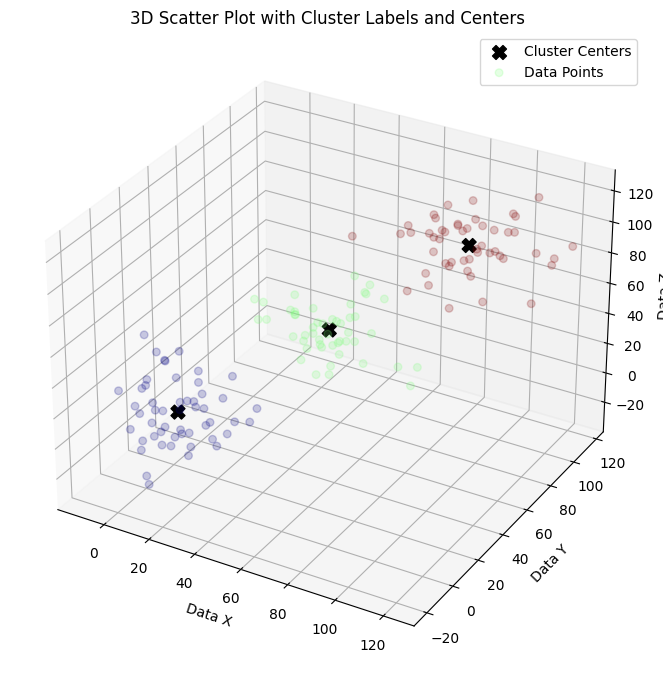

In [ ]:
# @title
##### Section 4 K Means Clustering ####

### Section 4.1 Perform K Means Clustering ###

# Prompt the user to choose the number of clusters for K-Means
num_clusters = int(input("Enter the number of clusters for K-Means: "))

# Initialize the K-Means model
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=1)

# Fit the K-Means model to the normalized data
kmeans.fit(normalized_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

### Section 4.2 Sort the Cluster centers ###

# Calculate the distances of cluster centers from the origin (0, 0)
distances_from_origin = np.sqrt(np.sum(cluster_centers ** 2, axis=1))

# Sort cluster centers based on distances from the origin
sorted_indices = np.argsort(distances_from_origin)

# Sort cluster centers and labels
sorted_cluster_centers = cluster_centers[sorted_indices]
sorted_cluster_labels = np.zeros_like(cluster_labels)

# Relabel the cluster labels based on the sorted order
for new_label, old_label in enumerate(sorted_indices):
    sorted_cluster_labels[cluster_labels == old_label] = new_label

# Calculate the count of each cluster label
cluster_labels_count = dict(zip(*np.unique(sorted_cluster_labels, return_counts=True)))

### Section 4.3 Denormalize the cluster centers ###

# Denormalize the data using the inverse transformation
cluster_centers_original_scale = sorted_cluster_centers * (max_vals.values - min_vals.values) + min_vals.values

### Section 4.4 Display Clustering counts for visual QC ###

# Display the count of each cluster label
print("\nCount of Each Cluster Label:")
for label, count in cluster_labels_count.items():
    print(f"Cluster {label}: {count} occurrences")

# Create a DataFrame with Cluster and Remaining Data
clustered_data_df = pd.DataFrame({
    'Cluster Number': sorted_cluster_labels,
    **{f'{col}': remaining_data[col] for col in remaining_data.columns}
})
clustered_data_df = clustered_data_df.round(4)

# Create a DataFrame with Cluster center data
center_data_df = pd.DataFrame(cluster_centers_original_scale, columns=remaining_data.columns)

# Add a new column 'Cluster Number' to indicate the cluster number for each row
center_data_df.insert(0, 'Cluster Number', range(num_clusters))
center_data_df = center_data_df.round(4)

### Section 4.5 Plot KMeans Clustering results ###
fig = plt.figure(figsize=(18, 18))

# Plot 1: 3D Scatter Plot with Cluster Labels and Centers
ax1 = fig.add_subplot(121, projection='3d')
centers_scatter = ax1.scatter(center_data_df['X'], center_data_df['Y'], center_data_df['Z'], c='black', marker='X',
                              s=100, alpha=1.0, label='Cluster Centers')
scatter = ax1.scatter(clustered_data_df['X'],clustered_data_df['Y'], clustered_data_df['Z'], c=sorted_cluster_labels, cmap='jet',
                      marker='o', s=30, alpha=0.2, label='Data Points')

ax1.set_title('3D Scatter Plot with Cluster Labels and Centers')
ax1.set_xlabel('Data X')
ax1.set_ylabel('Data Y')
ax1.set_zlabel('Data Z')
ax1.legend()

# Show the plots
plt.show()

# Section 5

This section introduces the MCASD (Multiple Cluster Average Standard Deviation) method, designed to aid you in identifying the optimal number of clusters for their dataset.

MCASD was first published as a method by [O'Leary _et al_ 2023](https://doi.org/10.1016/j.geoderma.2023.116348).

MCASD evaluates the stability of cluster centers across multiple attempts and cluster numbers. Participants will input the maximum number of clusters and the maximum number of attempts per cluster.

The code loops through different cluster numbers, applying K-Means clustering multiple times to analyze stability.

The results include GIFs illustrating scatter plots and line plots for each attempt. Additionally, MCASD metrics are calculated, providing insights into the stability and consistency of the clustering results for various numbers of clusters. A line plot visualizes the MCASD metric across various cluster numbers, aiding participants in selecting the optimal cluster count.

**All results, including csv files, plots and gifs, are compressed into a zip file for easy download.**

Please save this ZIP file to "Part 1" of the data directory you were provided with and unzip it to view the outputs from MCASD analysis.

The ultimate goal is to assist participants in making informed decisions about the optimal number of clusters for their specific dataset.

Press the play button to run the code. You will be prompted to enter the number of max number of clusters (i.e., 10) and max attempts (i.e., 10).

Note this might take some time depending on the max number of clusters and max attempts chosen.

Enter the maximum number of clusters for MCASD Method: 8
Enter the maximum number of attempts for MCASD Method: 5

Calculating MCASD Metrics...

MCASD Method clustering complete.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

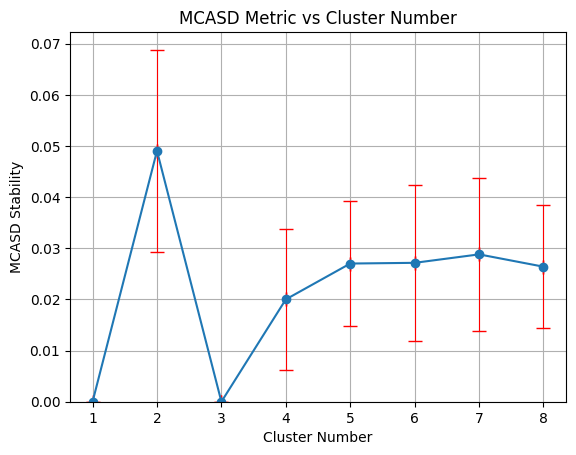

In [ ]:
# @title
#### Section 8 MCASD Method ####
### Section 8.1 Get information from the user ###

# Prompt the user for the maximum number of clusters for MCASD Method
max_num_clusters = int(input("Enter the maximum number of clusters for MCASD Method: "))
# Prompt the user for the maximum number of attempts for MCASD Method
max_attempts = int(input("Enter the maximum number of attempts for MCASD Method: "))

### Section 8.2 Loop for MCASD Method ###
# Create a DataFrame to store MCASD Metrics
mcasd_metrics_df = pd.DataFrame(index=['MCASD Metric', 'MCASD Error'], columns=range(1, max_num_clusters + 1))

print(f"\nCalculating MCASD Metrics...")

# Create a zip file to store all results
zip_filename = f'Agrogeo24_WS_Part_1_kmeans_plots.zip'
with ZipFile(zip_filename, 'w') as zip_file:

    # Loop through the various number of clusters
    for num_clusters in range(1, max_num_clusters + 1):
        images_attempt = []  # List to store images for the current attempt
        distances_df = pd.DataFrame()  # Initialize distances DataFrame

        # Cluster the data a user specified number of times (Attempts)
        for attempt in range(1, max_attempts + 1):
            #print(f"\nNumber of Clusters: {num_clusters}: Attempt {attempt} of {max_attempts}")

            # Initialize the K-Means model
            kmeans = KMeans(n_clusters=num_clusters, n_init=1, init='k-means++')

            # Fit the K-Means model to the normalized data
            kmeans.fit(normalized_data)

            # Get the cluster labels for each data point
            cluster_labels = kmeans.labels_

            # Get the cluster centers
            cluster_centers = kmeans.cluster_centers_

            ### Section 8.2.1 Sort the Cluster centers ###

            # Calculate the distances of cluster centers from the origin (0, 0)
            distances_from_origin = np.sqrt(np.sum(cluster_centers ** 2, axis=1))

            # Sort cluster centers based on distances from the origin
            sorted_indices = np.argsort(distances_from_origin)

            # Sort cluster centers and labels
            sorted_cluster_centers = cluster_centers[sorted_indices]
            sorted_cluster_labels = np.zeros_like(cluster_labels)

            # Relabel the cluster labels based on the sorted order
            for i, new_label in enumerate(np.arange(num_clusters)):
                old_label = sorted_indices[i]
                sorted_cluster_labels[cluster_labels == old_label] = new_label

            ### Section 8.2.2 Calculate the distance (in the dataspace) between each datapoint and its closest cluster center ###

            # Calculate the distances between cluster centers and data
            distances = np.linalg.norm(normalized_data.values[:, np.newaxis, :] - cluster_centers, axis=-1)

            # Get the smallest distance for each data point
            min_distances = np.min(distances, axis=1)

            # Create a DataFrame for distances with only the smallest distances
            new_column = pd.DataFrame(min_distances, columns=[f'Attempt_{attempt}'])

            # Append the new column to the existing distances_df
            distances_df = pd.concat([distances_df, new_column], axis=1)

            # Calculate the count of each cluster label
            cluster_labels_count = dict(zip(*np.unique(sorted_cluster_labels, return_counts=True)))

            # Create a DataFrame with Cluster and Remaining Data
            clustered_data_df = pd.DataFrame({
                'Cluster Number': sorted_cluster_labels,
                **{f'{col}': remaining_data[col] for col in remaining_data.columns}
            })
            clustered_data_df = clustered_data_df.round(4)

            ### Section 8.2.3 Denormalize the cluster centers ###

            cluster_centers_original_scale = sorted_cluster_centers * (max_vals.values - min_vals.values) + min_vals.values

            # Create a DataFrame with Cluster center data
            center_data_df = pd.DataFrame(cluster_centers_original_scale, columns=remaining_data.columns)

            # Add a new column 'Cluster Number' to indicate the cluster number for each row
            center_data_df.insert(0, 'Cluster Number', range(num_clusters))
            center_data_df = center_data_df.round(4)

            ### Section 8.2.4 Create and save plots for later GIF creation ###

            fig = plt.figure(figsize=(18, 18))

            # Plot 1: 3D Scatter Plot with Cluster Labels and Centers
            ax1 = fig.add_subplot(121, projection='3d')
            centers_scatter = ax1.scatter(center_data_df['X'], center_data_df['Y'], center_data_df['Z'], c='black', marker='X',
                                          s=100, alpha=1.0, label='Cluster Centers')
            scatter = ax1.scatter(clustered_data_df['X'],clustered_data_df['Y'], clustered_data_df['Z'], c=sorted_cluster_labels, cmap='jet',
                                  marker='o', s=30, alpha=0.3, label='Data Points')

            ax1.set_title(f'3D Scatter Plot with Cluster Labels and Centers: {num_clusters} Clusters, Attempt {attempt}')
            ax1.set_xlabel('Data X')
            ax1.set_ylabel('Data Y')
            ax1.set_zlabel('Data Z')
            ax1.legend()

            # Save the plots
            plot_filename = f'kmeans_plots_Attempt_{attempt}_Num_Clusters_{num_clusters}.png'
            plot_filepath = os.path.join(plot_filename)
            plt.tight_layout()
            plt.savefig(plot_filepath)
            #plt.show()  # Display the plot
            images_attempt.append(plot_filepath)  # Append the plot to the list
            plt.close()

        # Convert the images for the current number of clusters to a GIF
        gif_filename = f'kmeans_plots_Num_Clusters_{num_clusters}.gif'
        with imageio.get_writer(gif_filename, mode='I', fps=1, loop=0) as writer_attempt:
            for image_filename in images_attempt:
                # Adjust the image filename to include the subfolder
                image = imageio.imread(image_filename)
                writer_attempt.append_data(image)

                # Remove individual plot files after adding to GIF
                os.remove(image_filename)

        # Save the GIF to the current cluster folder
        zip_file.write(gif_filename)

        # Remove the GIF file after adding to the zip file
        os.remove(gif_filename)

        ### Section 8.3 Calculate MCASD metrics ###

        # Calculate Standard Deviation along each row
        row_std_dev = distances_df.std(axis=1)

        # Calculate Average of Standard Deviation for all Rows
        avg_std_dev = row_std_dev.mean()

        # Calculate Standard Deviation of the first Standard Deviation for all rows
        error = row_std_dev.std(axis=0)

        # Save values in the mcasd_metrics_df DataFrame
        mcasd_metrics_df.at['MCASD Metric', num_clusters] = avg_std_dev
        mcasd_metrics_df.at['MCASD Error', num_clusters] = error

        ### Section 8.4 Save results for final attempt at Cluster number to a CSV ###

        # Output file names
        output_cluster_filename = f'AgroGeo24_WS_Part_1_kmeans_{num_clusters}_cluster_data.csv'
        output_center_filename = f'AgroGeo24_WS_Part_1_kmeans_{num_clusters}_cluster_centers.csv'

        # Create a DataFrame with X, Y, Cluster, and Remaining Data
        clustered_data_df = pd.DataFrame({
            'Cluster Number': sorted_cluster_labels,
            'MCASD Metric': row_std_dev,
            **{f'{col}': remaining_data[col] for col in remaining_data.columns}
        })
        clustered_data_df = clustered_data_df.round(4)

        # Save the DataFrame to a CSV file
        clustered_data_df.to_csv(output_cluster_filename, index=False)

        # Create a DataFrame with Cluster center data
        center_data_df = pd.DataFrame(cluster_centers_original_scale, columns=remaining_data.columns)

        # Add a new column 'Cluster Number' to indicate the cluster number for each row
        center_data_df.insert(0, 'Cluster Number', range(num_clusters))
        center_data_df = center_data_df.round(4)

        # Save the DataFrame to a CSV file
        center_data_df.to_csv(output_center_filename, index=False)

        # Save the csv to the current cluster folder
        zip_file.write(output_cluster_filename)
        zip_file.write(output_center_filename)

        # Remove the csv file after adding to the zip file
        os.remove(output_cluster_filename)
        os.remove(output_center_filename)

    # Save mcasd_metrics_df to a CSV file
    mcasd_metrics_csv_filename = 'mcasd_metrics.csv'
    mcasd_metrics_df.to_csv(mcasd_metrics_csv_filename)

    # Add mcasd_metrics CSV file to the zip file
    zip_file.write(mcasd_metrics_csv_filename)

    # Remove the mcasd_metrics CSV file after adding to the zip file
    os.remove(mcasd_metrics_csv_filename)

    ### Section 8.5 Create MCASD metric plot for visual QC ###

    # Make a 2D Line plot
    plt.errorbar(mcasd_metrics_df.columns, mcasd_metrics_df.loc['MCASD Metric'],
                yerr=mcasd_metrics_df.loc['MCASD Error'], xerr=0, fmt='-o', capsize=5, ecolor='red', errorevery=1,
                elinewidth=0.8)
    plt.xlabel('Cluster Number')
    plt.ylabel('MCASD Stability')
    plt.title('MCASD Metric vs Cluster Number')
    plt.ylim(0)  # Set Y Axis starting at 0
    plt.xticks(np.arange(1, max_num_clusters + 1, 1))  # Set X Tick marks at all integers
    plt.grid(True)

    # Save the 2D line plot to the zip file
    line_plot_filename = 'mcasd_line_plot.png'
    plt.savefig(line_plot_filename)
    zip_file.write(line_plot_filename)
    os.remove(line_plot_filename)  # Remove the saved file after adding to the zip file

# Inform the user that the MCASD Method clustering is complete
print("\nMCASD Method clustering complete.")

### Section 8.6 Save the final zip file to the user's local machine ###

# Move the zip file to the user's local machine
files.download(zip_filename)
